# Project 3: Statistical Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import norm
import math as mt

## 1) Upload and analyze the data

In [2]:
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
mess = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users1.csv')

In [3]:
display(calls.head())
display(calls['duration'].describe())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [4]:
display(internet.head())
display(internet['mb_used'].describe())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [5]:
display(mess.head())
display(mess['user_id'].value_counts().head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


1132    1288
1328    1233
1324    1175
1470    1056
1077     804
Name: user_id, dtype: int64

In [6]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
display(users.head())
users.shape

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


(500, 8)

## 2) Prepare the data

- Convert data types
- remove or replace null values

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [9]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [11]:
mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [12]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Convert all dates from objects to datetimes
All other datatypes will work for this analysis

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
mess['message_date'] = pd.to_datetime(mess['message_date'], format='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')

#### Null values
Only the users table had null values, specifically in the churn_date column.
This means that 466 users were still using the service when the data was collected and the other 34 were not

In [15]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [16]:
print('Percent of users no longer using the service: {:.2f}%'.format((34/500)*100))

Percent of users no longer using the service: 6.80%


6.8% of users is not small enough for me to want to remove those users data. Instead of needing the date of ending service I can calculate days from registering up to the date of churn. I will make sure to be aware of this if using this column in analysis.

In [17]:
users['days_til_cancel'] = users['churn_date'] - users['reg_date']

In [18]:
users.head(7)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_til_cancel
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21 days


#### Looking for errors in the data
- Replacing or becoming aware of zeroes
- Removing troublesome data that could affect the analysis

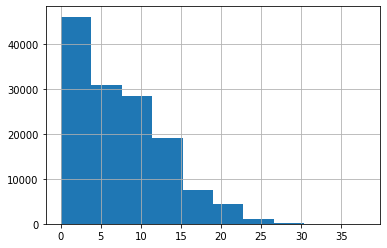

In [19]:
calls['duration'].hist()

In [20]:
display(calls[calls['duration'] == 0]['duration'].count())
display(calls.shape[0])

print('Percent of calls that lasted 0 seconds: {:.2f}%'.format((26834/137735)*100))

26834

137735

Percent of calls that lasted 0 seconds: 19.48%


#### Nearly 20% of calls lasted 0 second, I would assume they are either missed calls or were disconnected during the call

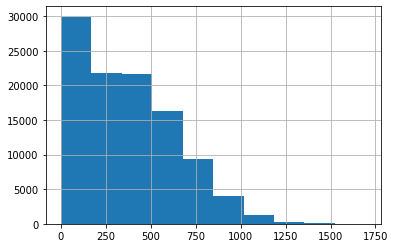

In [21]:
internet['mb_used'].hist()

In [22]:
zero_mb_count = internet[internet['mb_used'] == 0]['mb_used'].count()
int_count = internet.shape[0]

print('Percent of data sessions that used 0 mb of data: {:.2f}%'.format((zero_mb_count / int_count) * 100))

Percent of data sessions that used 0 mb of data: 13.11%


#### With 13% of data sessions using no data I would assume that many were possibly accidental clicks on data using applications that were quickly exited and never used any data. The issue is that 13% seems to high for that scenario alone. The other possible explanation would be that a user tried to use data, but were unable to connect.

### Right now the city column in the users table has data that may be better split up into city and state columns

In [23]:
users['city'].head()

0    Atlanta-Sandy Springs-Roswell, GA MSA
1          Seattle-Tacoma-Bellevue, WA MSA
2     Las Vegas-Henderson-Paradise, NV MSA
3                            Tulsa, OK MSA
4          Seattle-Tacoma-Bellevue, WA MSA
Name: city, dtype: object

In [24]:
l = users['city'].str.split(',')
l.head()

0    [Atlanta-Sandy Springs-Roswell,  GA MSA]
1          [Seattle-Tacoma-Bellevue,  WA MSA]
2     [Las Vegas-Henderson-Paradise,  NV MSA]
3                            [Tulsa,  OK MSA]
4          [Seattle-Tacoma-Bellevue,  WA MSA]
Name: city, dtype: object

In [25]:
cities = []
states = []
for i in range(0, len(l)):
    cities.append(l[i][0])
    states.append(l[i][1])

In [26]:
users['new_cities'] = cities
users['new_cities'] = users['new_cities'].str.replace('-',', ')
users['new_states'] = states
users['new_states'] = users['new_states'].str.rstrip('MSA')

In [27]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_til_cancel,new_cities,new_states
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT,"Atlanta, Sandy Springs, Roswell",GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT,"Seattle, Tacoma, Bellevue",WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT,"Las Vegas, Henderson, Paradise",NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT,Tulsa,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT,"Seattle, Tacoma, Bellevue",WA


### For each user, calculate:
- number of calls and minutes used per month
- number of texts sent per month
- Volume of data used per month
- Monthly profit from each user (subtract the free package limit from each and multiply result by the calling plan value, add monthly charge depending on the plan)

I will have to use data slices across multiple tables to czlculate new columns attached to the users


In [28]:
calls['month'] = calls['call_date'].dt.month
calls_mins = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
calls_mins.columns = ['num_calls', 'mins_used']
calls_mins.reset_index()

,user_id,month,num_calls,mins_used
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [29]:
mess['month'] = mess['message_date'].dt.month
mess_sent = mess.groupby(['user_id', 'month'])['id'].agg(['count'])
mess_sent.columns = ['messages_sent']
mess_sent.reset_index()

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [30]:
internet['month'] = internet['session_date'].dt.month
data_vol = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum'])
data_vol.columns = ['data_volume']
data_vol.reset_index()

,user_id,month,data_volume
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


#### Merge these three tables into one

In [31]:
t1 = users[['user_id', 'plan']]
t1.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [32]:
t = calls_mins.merge(mess_sent, on=['user_id', 'month'], how='outer')
t = t.merge(data_vol, on=['user_id', 'month'], how='outer', sort=True)
t = t.fillna(0)
t = t.reset_index()
t.head()

,user_id,month,num_calls,mins_used,messages_sent,data_volume
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [33]:
tt = pd.DataFrame(t)
tt = tt.merge(t1, on='user_id', how='outer', sort=True)
tt['data_volume'] = tt['data_volume'].apply(np.ceil)
tt.head(2)

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan
0,1000,12.0,16.0,124.0,11.0,1902.0,ultimate
1,1001,8.0,27.0,182.0,30.0,6920.0,surf


In [34]:
zero_min_calls = tt[tt['mins_used'] == 0]['mins_used'].count()
print('Percent of calls lasting zero minutes: {:.2f}%'.format((zero_min_calls / len(tt))*100))

Percent of calls lasting zero minutes: 1.61%


In [35]:
tt = tt[tt['mins_used'] > 0]
tt[tt['mins_used'] == 0]['mins_used'].count()

0

In [36]:
tt.head()

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan
0,1000,12.0,16.0,124.0,11.0,1902.0,ultimate
1,1001,8.0,27.0,182.0,30.0,6920.0,surf
2,1001,9.0,49.0,315.0,44.0,13315.0,surf
3,1001,10.0,65.0,393.0,53.0,22331.0,surf
4,1001,11.0,64.0,426.0,36.0,18505.0,surf


Filtering out calls that lasted 0 minutes. there were 36 total and they accounted for only 1.5% of all the data so it will not be much

#### Checking for users with a churn date:

In [37]:
churned = users[users['churn_date'].notnull()]['churn_date'].count()
print('Number of churned users: {}'.format(churned))

Number of churned users: 34


In [38]:
churn_users = users[users['churn_date'].notnull()]
churn_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_til_cancel,new_cities,new_states
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,21 days,"San Francisco, Oakland, Berkeley",CA
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16,141 days,"Chicago, Naperville, Elgin",IL-IN-WI
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,140 days,"New York, Newark, Jersey City",NY-NJ-PA
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30,7 days,"Philadelphia, Camden, Wilmington",PA-NJ-DE-MD
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07,201 days,"Miami, Fort Lauderdale, West Palm Beach",FL


Checking if users have activity after churn date further down.

In [39]:
def user_profit(df):
    if df[6] == 'surf':
        mins = (df[3] - 500) * 0.03
        if mins < 0:
                mins = 0
        msgs = (df[4] - 50) * 0.03
        if msgs < 0:
            msgs = 0
        data_p = ((df[5] - 15360)/1024) * 10
        if data_p < 0:
            data_p = 0
        base = 20
        return mins + msgs + data_p + base
    elif df[6 == 'ultimate']:
        mins = (df[3] - 3000) * 0.01
        if mins < 0:
                mins = 0
        msgs = (df[4] - 1000) * 0.01
        if msgs < 0:
            msgs = 0
        data_p = ((df[5] - 30720)/1024) * 7
        if data_p < 0:
            data_p = 0
        base = 50
        return mins + msgs + data_p + base
    else:
        return 'Error'
tt['profit'] = tt.apply(user_profit, axis=1).round(decimals=2)
tt.head()

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan,profit
0,1000,12.0,16.0,124.0,11.0,1902.0,ultimate,50.00
1,1001,8.0,27.0,182.0,30.0,6920.0,surf,20.00
2,1001,9.0,49.0,315.0,44.0,13315.0,surf,20.00
3,1001,10.0,65.0,393.0,53.0,22331.0,surf,88.17
4,1001,11.0,64.0,426.0,36.0,18505.0,surf,50.71


Adding state name to table in order to work on later hypothesis

In [40]:
t2 = users[['user_id', 'new_states']]
tt = tt.merge(t2, on='user_id', how='outer', sort=True)
t3 = churn_users[['user_id', 'churn_date']]
tt = tt.merge(t3, on='user_id', how='outer', sort=True)
tt.head()

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan,profit,new_states,churn_date
0,1000,12.0,16.0,124.0,11.0,1902.0,ultimate,50.00,GA,NaT
1,1001,8.0,27.0,182.0,30.0,6920.0,surf,20.00,WA,NaT
2,1001,9.0,49.0,315.0,44.0,13315.0,surf,20.00,WA,NaT
3,1001,10.0,65.0,393.0,53.0,22331.0,surf,88.17,WA,NaT
4,1001,11.0,64.0,426.0,36.0,18505.0,surf,50.71,WA,NaT


In [41]:
tt['churn_month'] = tt['churn_date'].dt.month
bad_dates = tt[tt['month'] > tt['churn_month']].index

In [42]:
bad_dates

Int64Index([  54,   80,   81,   82,  213,  214,  312,  405,  499,  817,  907,
            1034, 1035, 1138, 1139, 1306, 1427, 1428, 1636, 1637, 1669, 1670,
            1671, 1672, 1922, 1923, 1924, 1933, 2034, 2035, 2127, 2128, 2129,
            2138, 2232, 2233, 2234],
           dtype='int64')

In [43]:
tt = tt.drop(bad_dates, axis=0)
bad_check = tt[tt['month'] > tt['churn_month']].count()
bad_check

user_id          0
month            0
num_calls        0
mins_used        0
messages_sent    0
data_volume      0
plan             0
profit           0
new_states       0
churn_date       0
churn_month      0
dtype: int64

Dropped all datapoints where an activity was recorded after the churn date for users that were churned. Since there were only 37 I did not feel that it was a large enough portion of the data to handle in another way.

In [44]:
tt.dropna(subset=['profit'], inplace=True)
tt['profit'].isna().sum()

0

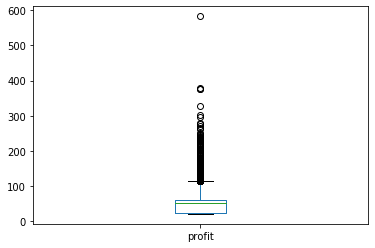

In [45]:
#tt['profit'].hist(bins=20)
tt['profit'].plot(kind='box')

In [46]:
tt['profit'].describe()

count    2219.000000
mean       55.489648
std        43.439601
min        20.000000
25%        23.220000
50%        50.000000
75%        59.185000
max       583.070000
Name: profit, dtype: float64

In [47]:
over_300 = tt.loc[tt['profit'] > 300]
num_over_300 = tt.loc[tt['profit'] > 300]['user_id'].count()
less_300 = tt.loc[tt['profit'] <= 300]['user_id'].count()
print(num_over_300)
print(less_300)
print(num_over_300/len(tt))

6
2213
0.0027039206849932404


In [48]:
over_300

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan,profit,new_states,churn_date,churn_month
1109,1240,8.0,161.0,1095.0,15.0,49951.0,surf,375.65,LA,NaT,NaN
1111,1240,10.0,162.0,1194.0,9.0,42129.0,surf,302.24,LA,NaT,NaN
1340,1292,8.0,42.0,323.0,0.0,51810.0,surf,375.96,TX,NaT,NaN
1342,1292,10.0,42.0,303.0,0.0,46869.0,surf,327.71,TX,NaT,NaN
1344,1292,12.0,28.0,144.0,0.0,52035.0,surf,378.15,TX,NaT,NaN
1738,1379,12.0,144.0,1103.0,126.0,70932.0,surf,583.07,MI,NaT,NaN


In [49]:
tt.head()

,user_id,month,num_calls,mins_used,messages_sent,data_volume,plan,profit,new_states,churn_date,churn_month
0,1000,12.0,16.0,124.0,11.0,1902.0,ultimate,50.00,GA,NaT,NaN
1,1001,8.0,27.0,182.0,30.0,6920.0,surf,20.00,WA,NaT,NaN
2,1001,9.0,49.0,315.0,44.0,13315.0,surf,20.00,WA,NaT,NaN
3,1001,10.0,65.0,393.0,53.0,22331.0,surf,88.17,WA,NaT,NaN
4,1001,11.0,64.0,426.0,36.0,18505.0,surf,50.71,WA,NaT,NaN


#### After checking for certain outliers based on errors, bugs, or no reason, it seems that the calculation is correct and the biggest spenders (those over 300 USD per month) often use way more data than their plan allows. since each gigabyte is rounded and extra costs 10 usd per GB, their monthly cost goes way up.

## 3) Analyze the Data
- Describe the customers' behavior.
- Find the minutes, texts, and volume of data the users of each plan require per month.
- Calculate the mean, dispersion, and standard deviation.
- Plot histograms. Describe the distributions.

In [50]:
s_cust = tt[tt['plan'] == 'surf']
s_base = tt[tt['profit'] == 20]['user_id'].count()
s_base_pcnt = (s_base / s_cust.shape[0])*100
s_profit = s_cust['profit'].sum()
s_ppc = s_profit / s_cust['user_id'].nunique()

print('Count of months where surf customers paid the base price: {}'.format(s_base))
print()
print('Percent of months where the base price is paid: {:.2f}%'.format(s_base_pcnt))
print()
print('Average monthly profit: ${:.2f}'.format(s_cust['profit'].mean()))
print()
print('Profit per surf customer: ${:,.2f}'.format(s_ppc))

Count of months where surf customers paid the base price: 412

Percent of months where the base price is paid: 27.12%

Average monthly profit: $57.04

Profit per surf customer: $266.61


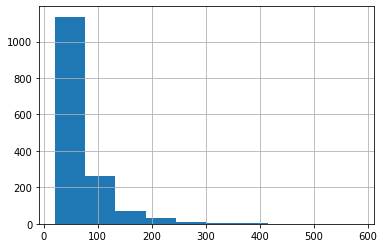

In [51]:
s_cust['profit'].hist()

In [52]:
u_cust = tt[tt['plan'] == 'ultimate']
u_base = tt[tt['profit'] == 50]['user_id'].count()
u_base_pcnt = (u_base / u_cust.shape[0])*100
u_profit = u_cust['profit'].sum()
u_ppc = u_profit / u_cust['user_id'].nunique()

print('Count of months where ultimate customers paid the base price: {}'.format(u_base))
print()
print('Percent of months where the base price is paid: {:.2f}%'.format(u_base_pcnt))
print()
print('Average monthly profit: ${:.2f}'.format(u_cust['profit'].mean()))
print()
print('Profit per ultimate customer: ${:,.2f}'.format(u_ppc))

Count of months where ultimate customers paid the base price: 660

Percent of months where the base price is paid: 94.29%

Average monthly profit: $52.12

Profit per ultimate customer: $238.45


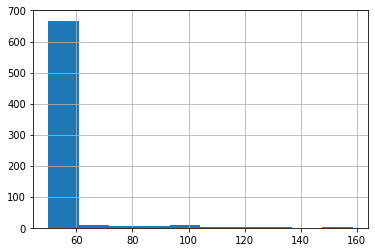

In [53]:
u_cust['profit'].hist()

#### Plan and User data:
Looking at the plan data based on each month for the users, I found a few differences in surf and ultimate customers:
- Surf
    - Customers pay the base cost of $20 about 29% of the time and pay extra in most months
    - The common overpaying is the likely reason why profit per customer is greater than 10x the base price
    - From the histogram we can see that the tail is large and takes up more than the bar over the base price

- Ultimate
    - Customers pay the base cost of $50 nearly 95% of the time and rarely pay extra
    
    - Although most ultimate customers only pay $50 per month, higher than the surf base, they don't overpay often so their average profit is less
    
    - You can see in the histograms that anything past the base price is quite minimal

### Surf Customers

In [54]:
def hist_n_stats(series, title, xlabel):
    series.hist()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    print('Average: {:.2f}'.format(series.mean()))
    print('Median: {:.2f}'.format(series.median()))
    print('Variance: {:.2f}'.format(np.var(series)))
    print('Standard Deviation: {:.2f}'.format(np.std(series)))

Surf Minutes Used

Average: 436.99
Median: 430.00
Variance: 52777.30
Standard Deviation: 229.73


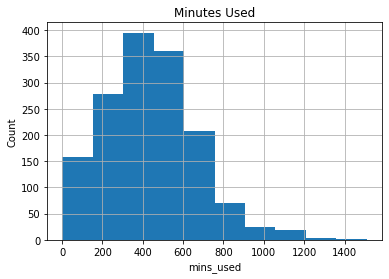

In [55]:
print('Surf Minutes Used')
print()
hist_n_stats(s_cust['mins_used'], 'Minutes Used', 'mins_used')

#### Minutes used for surf customers has a slight positive skew, but is relatively normal with the average only 6 minutes above the median

Surf Messages Sent

Average: 30.87
Median: 23.00
Variance: 1136.47
Standard Deviation: 33.71


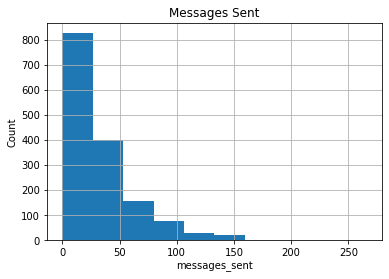

In [56]:
print('Surf Messages Sent')
print()
hist_n_stats(s_cust['messages_sent'], 'Messages Sent', 'messages_sent')

#### Messages for Surf customersis more of a poisson distribution with a strong positive skew.

Surf Data Used

Average: 16517.15
Median: 16863.00
Variance: 61287117.90
Standard Deviation: 7828.61


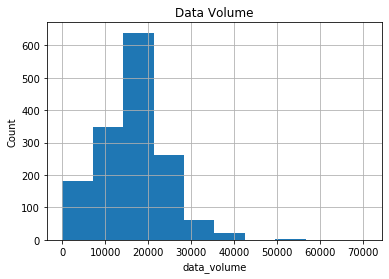

In [57]:
print('Surf Data Used')
print()
hist_n_stats(s_cust['data_volume'], 'Data Volume', 'data_volume')

#### Data usage for Surf customers has a negative skew with the mean about 500 mb to the left of the mean

### Ultimate Customers

Average: 435.07
Median: 427.50
Variance: 56510.29
Standard Deviation: 237.72


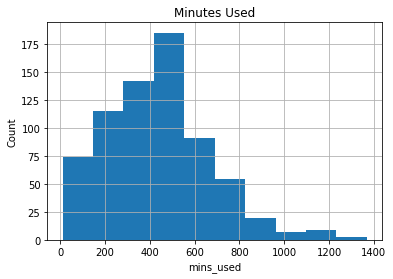

In [58]:
hist_n_stats(u_cust['mins_used'], 'Minutes Used', 'mins_used')

#### Minutes used for Ultimate customers has a slight positive skew, with 8 minutes separating the mean and median

Average: 38.03
Median: 30.00
Variance: 1217.19
Standard Deviation: 34.89


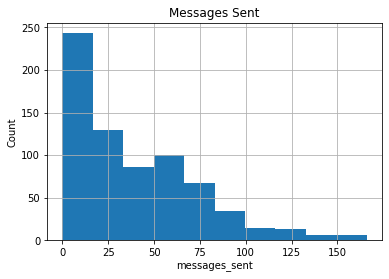

In [59]:
hist_n_stats(u_cust['messages_sent'], 'Messages Sent', 'messages_sent')

#### Messages sent for ultimate customers is similar to that of Surf customers with a Poisson seeming distribution showing the strong positive skew.

Average: 17331.90
Median: 16867.50
Variance: 60270968.06
Standard Deviation: 7763.44


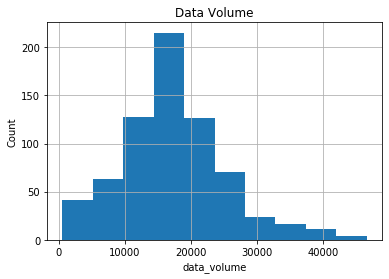

In [60]:
hist_n_stats(u_cust['data_volume'], 'Data Volume', 'data_volume')

#### Data usage for Ultimate customers is relatively normal with a slight positive skew

## Step 4) Test the Hypotheses
- Explain:
    - How you formulated the null and alternative hypotheses.
    - What criterion you used to test the hypotheses and why.

### Hypothesis #1:
- Null Hypothesis: The average profit from users of Ultimate and Surf calling plans differs.
- Alternative Hypothesis: The average profit from users of Ultimate and Surf calling plans does not significantly differ.

In [61]:
print('Average Profit for Surf customers: ${:.2f}'.format(s_ppc))
print('Average Profit for Ultimate customers: ${:.2f}'.format(u_ppc))
print('Difference: ${:.2f}'.format(u_ppc-s_ppc))

Average Profit for Surf customers: $266.61
Average Profit for Ultimate customers: $238.45
Difference: $-28.16


In [62]:
samp_1 = s_cust['profit']
samp_2 = u_cust['profit']
alpha = 0.05

results = st.ttest_ind(samp_1, samp_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.013033860095386042
We reject the null hypothesis


#### Hypothesis 1 Result: 
Based on this p-value we  reject the null hypothesis that the profit per customer from the two plans differs. The probability is lower than the alpha of 0.05. Reducing the alpha to 0.01 would make it so we could not reject, b ut in this case we are using the larger alpha.

## Hypothesis #2:
- Null Hypothesis: The average profit from users in NY-NJ area is different from that of the users from other regions.
- Alternative Hypothesis: The average profit from users in NY-NJ area is not significantly different from that of the users from other regions.

In [63]:
len(tt)

2219

In [64]:
ny_nj = tt.loc[(tt['new_states'].str.contains('NY')) | (tt['new_states'].str.contains('NJ'))]
other_states = tt.loc[~(tt['new_states'].str.contains('NY')) & ~(tt['new_states'].str.contains('NJ'))]

In [65]:
print(len(ny_nj))
print(len(other_states))
print(len(ny_nj) + len(other_states))

473
1746
2219


In [66]:
ny_nj_samp = ny_nj['profit']
other_samp = other_states['profit']
alpha_2 = 0.05

res = st.ttest_ind(ny_nj_samp, other_samp)

print('p-value: ', res.pvalue)

if (res.pvalue < alpha_2):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.51095985551473
We can't reject the null hypothesis


#### Hypothesis 2 result:
In this hypothesis we find that the p-value is just around 51%. This means tht there is a 51% probability of randomly getting a difference that value or greater. Since that falls wall above our alpha of 0.05, we cannot reject the null hypothesis. The p-value is too high to conclude that there is a significant difference in average profit from users in NY-NJ and those from all other areas.

## 5) Overall Conclusion:
Overall, I have found that, in general, both the surf and ultimate plans bring in about the same amount in average profit. Also residents that live in areas including New York and New Jersey do not generate a significntly different average profit when compared to all other states. Outside of the tests, I noticed some differences in the two plans. Even though they both bring in similar amounts of profit on average, Surf users are much more likely to be paying extra than their base price each month, whereas Ultimate users rarely use more messages, minutes, and data than the base amount their plan provides. THe overpayment by Surf users at least partially accounts for the reason both plans bring in a significant amount of profit. Ultimate users pay the higher base, while Surf users pay a lower base but more in extra usage costs.